In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/dementia_patients_health_data.csv')

In [ ]:
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diabetic                   1000 non-null   int64  
 1   AlcoholLevel               1000 non-null   float64
 2   HeartRate                  1000 non-null   int64  
 3   BloodOxygenLevel           1000 non-null   float64
 4   BodyTemperature            1000 non-null   float64
 5   Weight                     1000 non-null   float64
 6   MRI_Delay                  1000 non-null   float64
 7   Prescription               485 non-null    object 
 8   Dosage in mg               485 non-null    float64
 9   Age                        1000 non-null   int64  
 10  Education_Level            1000 non-null   object 
 11  Dominant_Hand              1000 non-null   object 
 12  Gender                     1000 non-null   object 
 13  Family_History             1000 non-null   object

In [ ]:
df.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [ ]:
df.isna().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [ ]:
df.shape

(1000, 24)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['BloodOxygenLevel'] = df['BloodOxygenLevel'].round().astype(int)
df['BodyTemperature'] = df['BodyTemperature'].round().astype(int)
df['Weight'] = df['Weight'].round().astype(int)
df['MRI_Delay'] = df['MRI_Delay'].round().astype(int)
df['Prescription'] = df['Prescription'].fillna('No prescription')
df['Chronic_Health_Conditions'] = df['Chronic_Health_Conditions'].fillna('No chronic disease')
df['Age'] = df['Age'].fillna(0)
df['Dosage in mg'] = df['Dosage in mg'].fillna(0)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' unique values:")
    print(unique_values)
    print("\n")

Column 'Diabetic' unique values:
[1 0]


Column 'AlcoholLevel' unique values:
[0.08497363 0.01697277 0.00900025 0.08643726 0.15074731 0.1140278
 0.01619378 0.16115808 0.01575425 0.09733954 0.06748564 0.08267123
 0.02807717 0.08805155 0.15656361 0.1659716  0.03567131 0.02930638
 0.15908456 0.19710716 0.09234223 0.08905676 0.04706498 0.0022444
 0.1559942  0.1055605  0.10967133 0.05261273 0.1413211  0.14555626
 0.01621965 0.06240634 0.1894373  0.16636984 0.13061763 0.15008774
 0.08112397 0.1656683  0.09992415 0.04157571 0.10991138 0.05445505
 0.14617384 0.19078454 0.04034117 0.07321483 0.14017791 0.0227364
 0.04778358 0.08807547 0.02556337 0.18617617 0.04906598 0.0979699
 0.10318646 0.10808652 0.16685116 0.1303138  0.15566145 0.14444342
 0.04741042 0.00132653 0.17627566 0.03855862 0.0289448  0.05047045
 0.07885336 0.10065803 0.12261174 0.12878761 0.14539247 0.12008087
 0.10553423 0.1484994  0.14102849 0.08203411 0.01674517 0.02715007
 0.0348211  0.11560427 0.00184745 0.005932   0.18054106

# **EDA**

In [ ]:
# Plot 2: Scatter plot of HeartRate vs. Age
fig2 = px.scatter(df, x='Age', y='HeartRate', color='Diabetic', title='Heart Rate vs. Age')
fig2.show()

In [ ]:
# Plot 3: Histogram of BloodOxygenLevel
fig3 = px.histogram(df, x='BloodOxygenLevel', nbins=5, title='Histogram of Blood Oxygen Level')
fig3.show()

In [ ]:
# Plot 4: Bar plot of Average BodyTemperature by Smoking Status
fig4 = px.bar(df, x='Smoking_Status', y='BodyTemperature', title='Average Body Temperature by Smoking Status', barmode='group')
fig4.show()

In [ ]:
# Plot 5: Count plot of Chronic Health Conditions
fig5 = px.histogram(df, x='Chronic_Health_Conditions', title='Count of Chronic Health Conditions')
fig5.show()

In [ ]:
# Plot 6: Violin plot of Weight by Physical Activity
fig6 = px.violin(df, x='Physical_Activity', y='Weight', box=True, points='all', title='Weight Distribution by Physical Activity')
fig6.show()

In [ ]:
# Plot 7: Hexbin plot of BloodOxygenLevel and BodyTemperature
fig7 = px.density_heatmap(df, x='BloodOxygenLevel', y='BodyTemperature', nbinsx=10, nbinsy=10, title='Hexbin of Blood Oxygen Level and Body Temperature')
fig7.show()

In [ ]:
# Plot 8: Box plot of Cognitive Test Scores by Dementia status
fig8 = px.box(df, x='Dementia', y='Cognitive_Test_Scores', title='Cognitive Test Scores by Dementia Status')
fig8.show()

In [ ]:
# Plot 9: Bar plot of Prescription counts
fig9 = px.bar(df, x='Prescription', title='Count of Prescriptions')
fig9.show()

In [ ]:
# Print the count of each category in the Dementia column
dementia_counts = df['Dementia'].value_counts()
print(dementia_counts)

# Create a pie chart using Plotly
fig = px.pie(df, names='Dementia', title='Distribution of Dementia Status before oversampling', hole=0.4)
fig.show()

Dementia
0    515
1    485
Name: count, dtype: int64


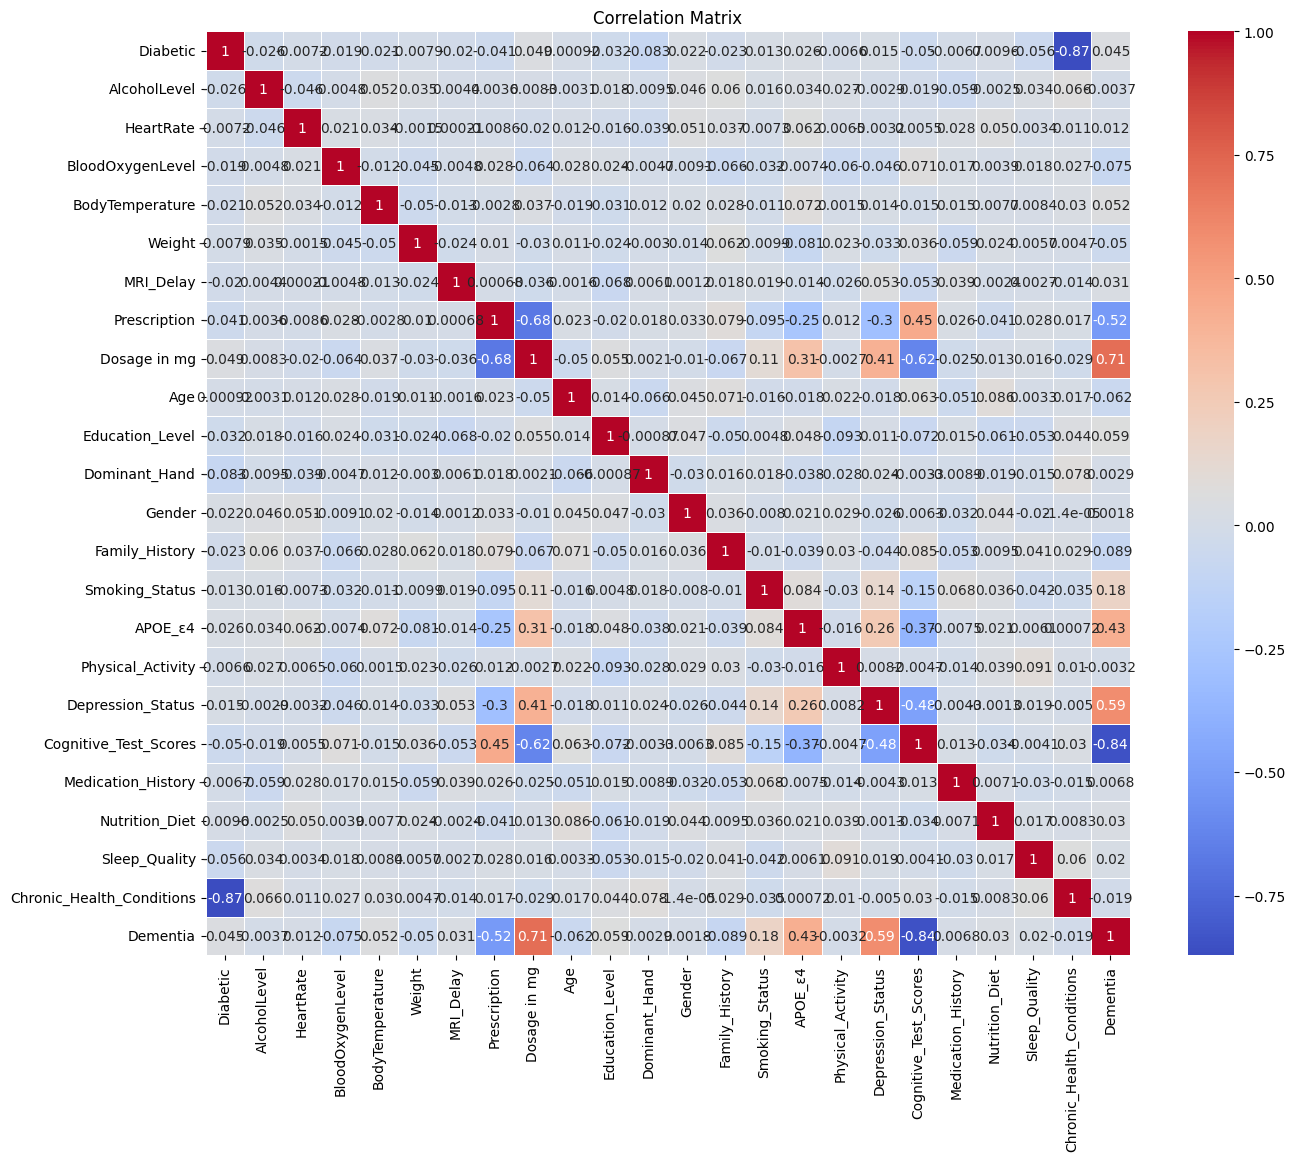

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numeric using LabelEncoder
categorical_columns = ['Prescription','Education_Level','Dominant_Hand','Gender','Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(['AlcoholLevel','Dominant_Hand','Gender','Physical_Activity','Medication_History','HeartRate','Chronic_Health_Conditions'],axis=1,inplace=True)

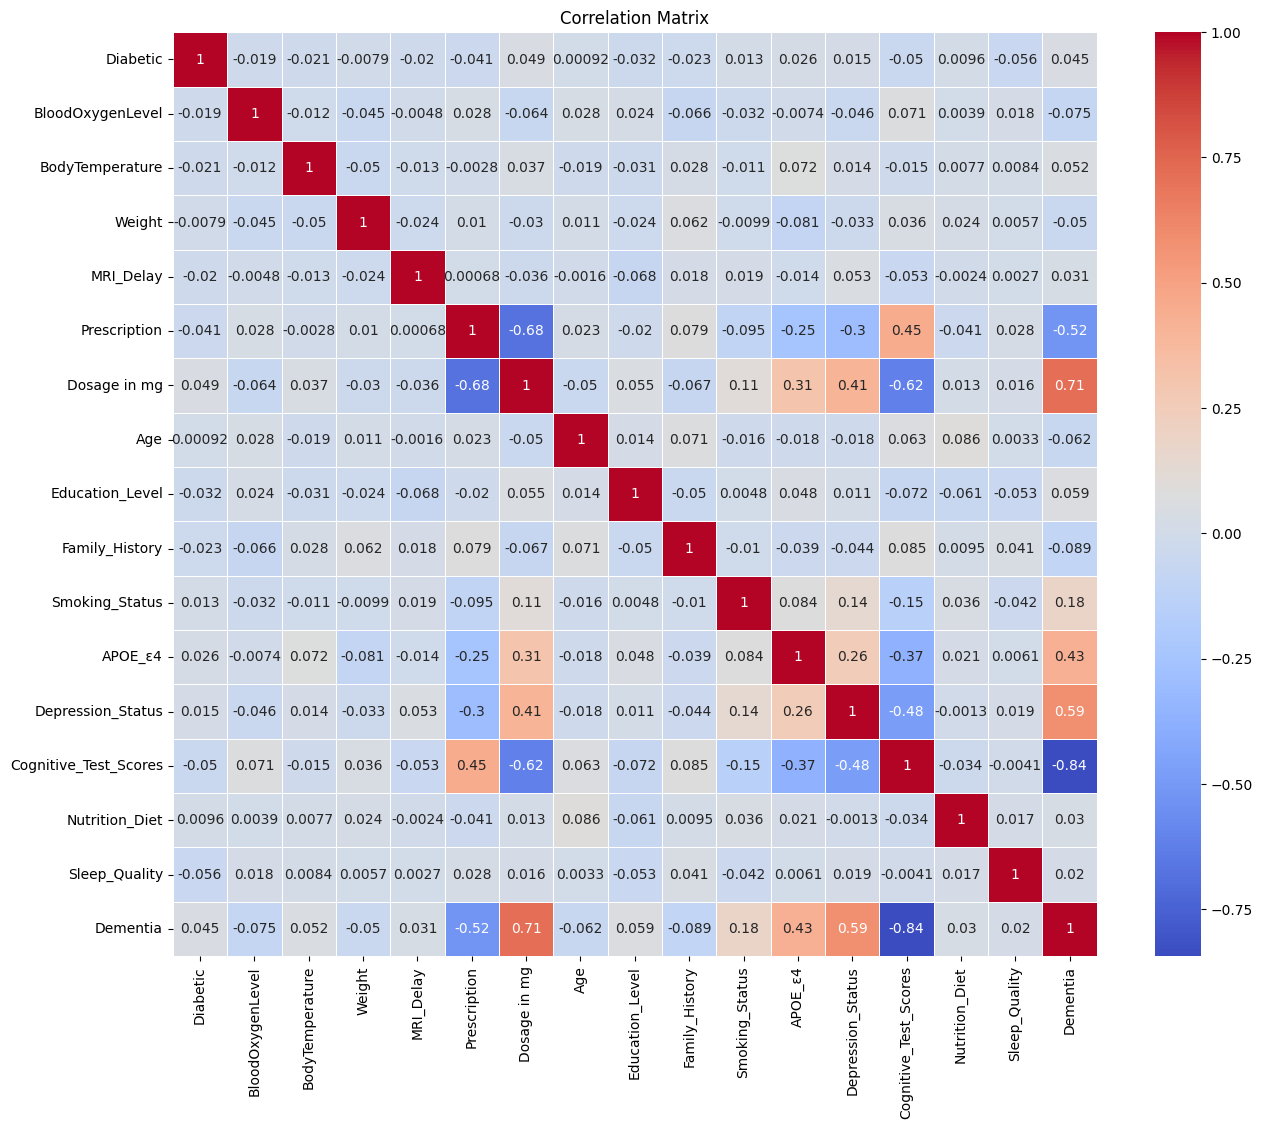

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(['MRI_Delay','Nutrition_Diet','Sleep_Quality'],axis=1,inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
# Separate features and target
X = df.drop(columns=['Dementia'])
y = df['Dementia']

# Perform oversampling using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a DataFrame
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Dementia'])], axis=1)

# Print the count of each category in the Dementia column after oversampling
dementia_counts_resampled = df['Dementia'].value_counts()
print(dementia_counts_resampled)

# Create a pie chart using Plotly
fig = px.pie(df, names='Dementia', title='Distribution of Dementia Status After Oversampling', hole=0.4)
fig.show()

Dementia
0    515
1    515
Name: count, dtype: int64


In [ ]:
df.head()

,Diabetic,BloodOxygenLevel,BodyTemperature,Weight,Prescription,Dosage in mg,Age,Education_Level,Family_History,Smoking_Status,APOE_ε4,Depression_Status,Cognitive_Test_Scores,Dementia
0,1,96,36,58,3,0.0,60,2,0,0,0,0,10,0
1,0,93,36,57,1,12.0,61,3,0,1,1,0,1,1
2,0,94,37,60,3,0.0,69,2,1,1,0,0,8,0
3,0,94,37,58,0,23.0,78,3,1,2,0,1,5,1
4,1,98,36,68,2,20.0,77,3,1,2,1,0,0,1


In [ ]:
df.drop(['Dosage in mg'],axis=1,inplace=True)

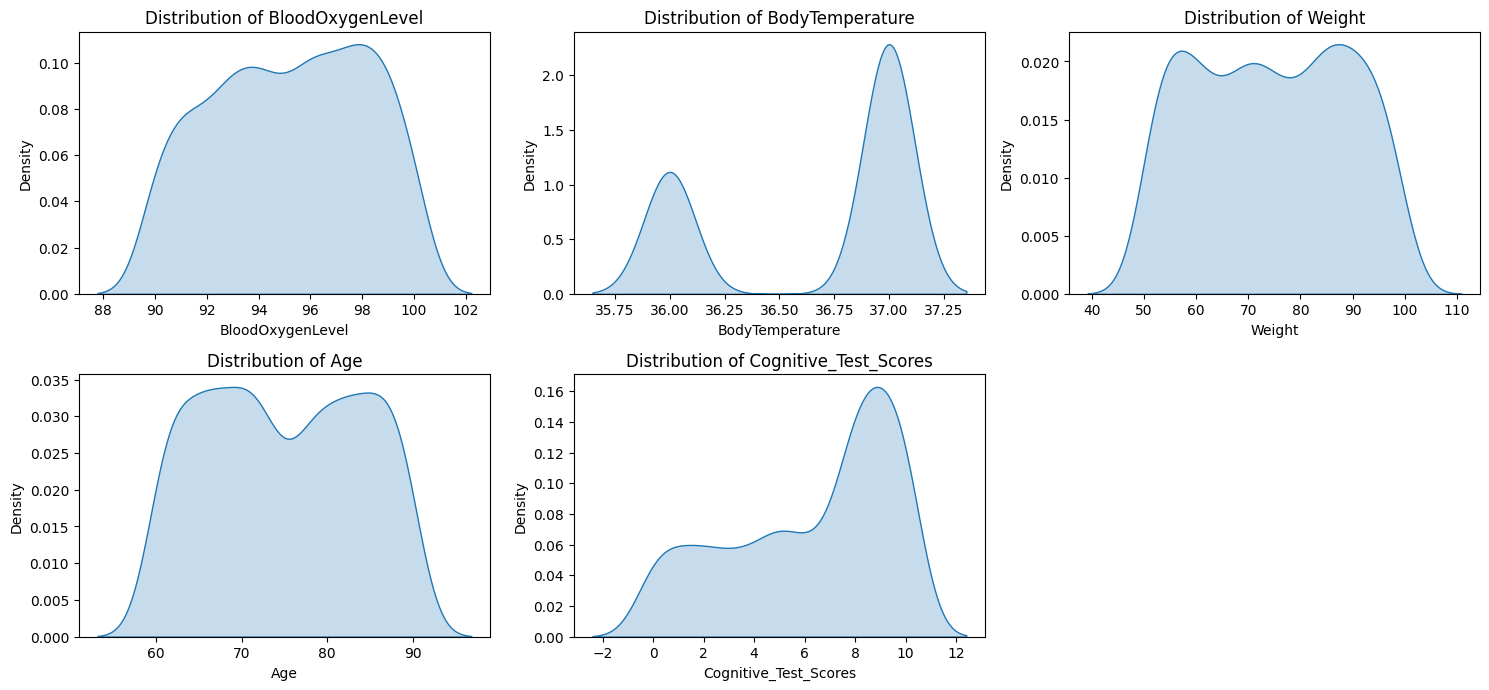

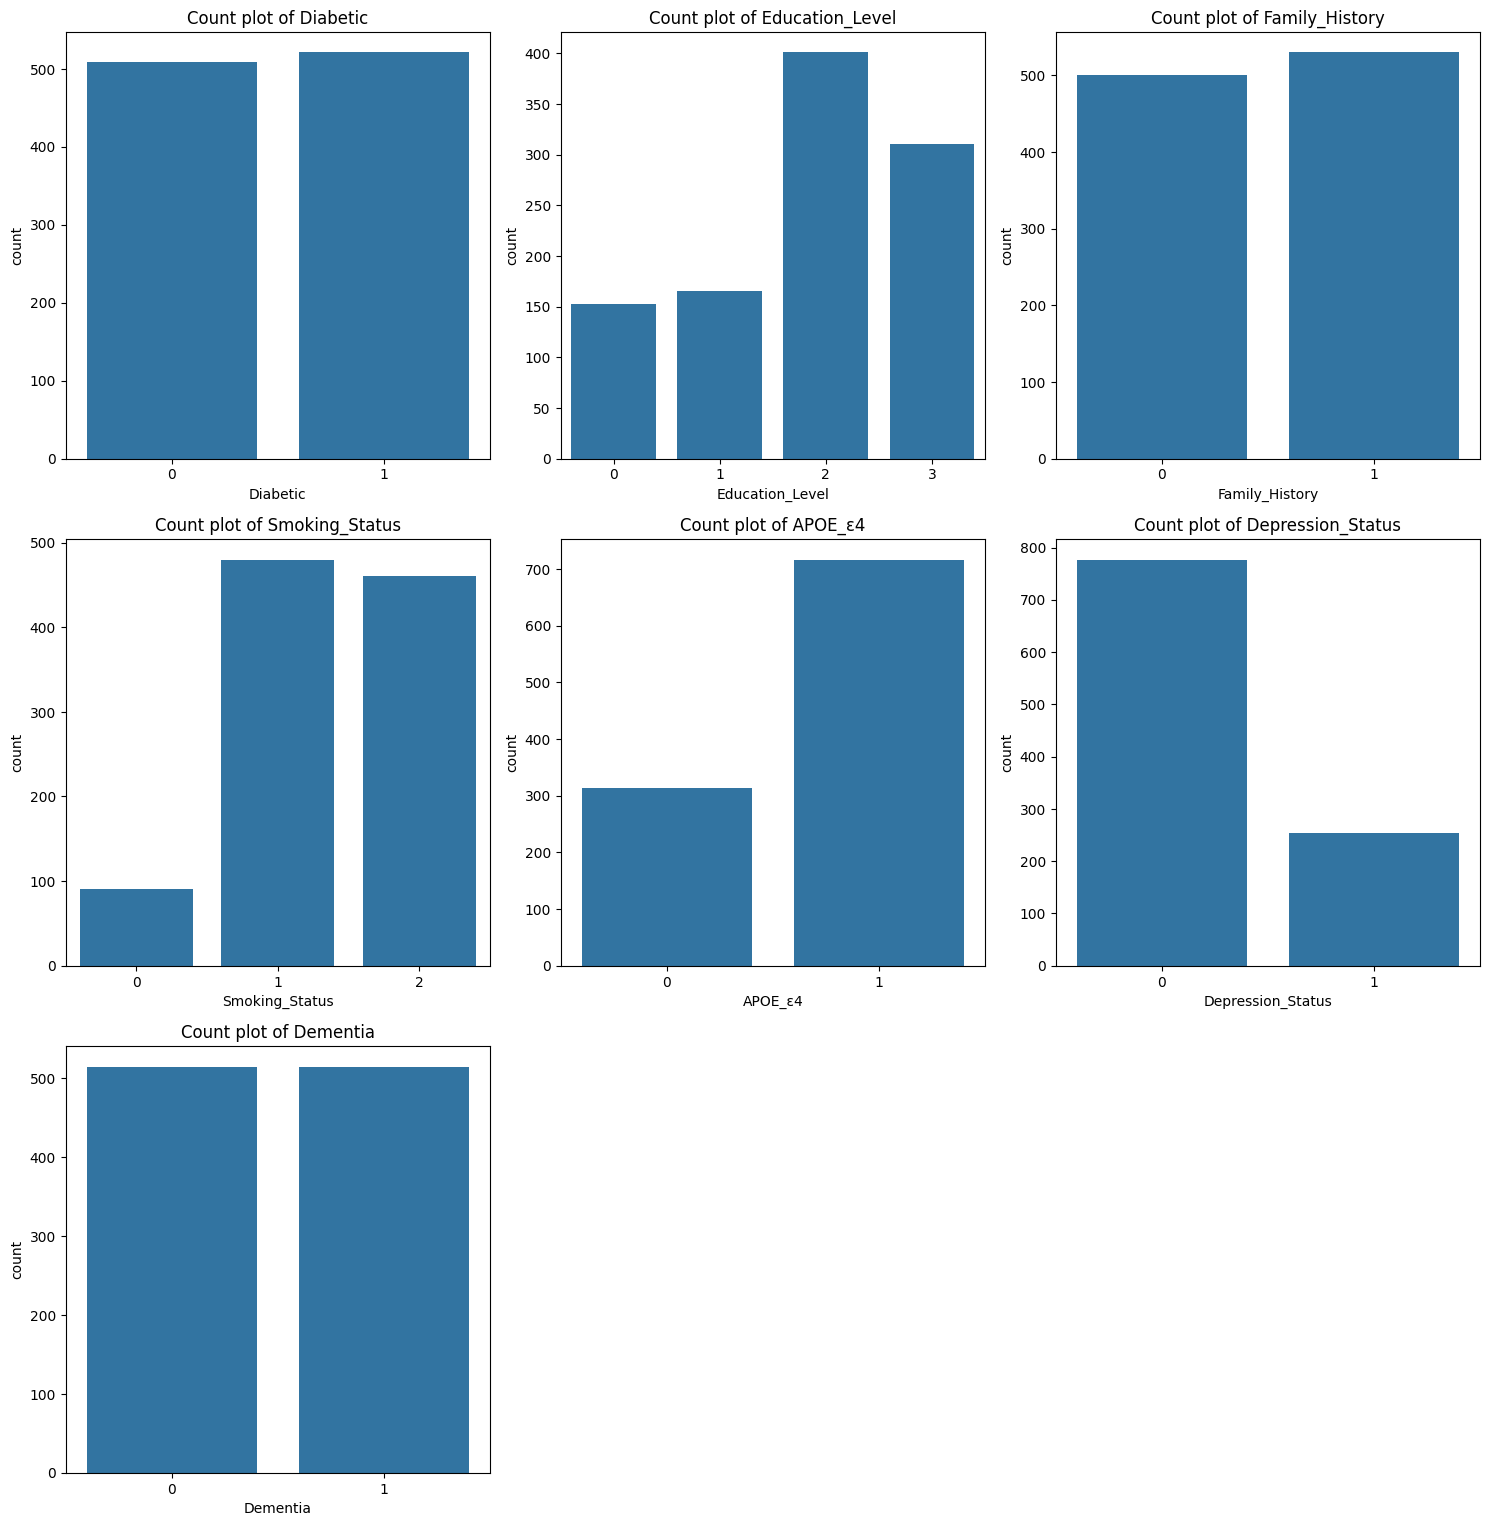

In [ ]:
# Plot distribution for continuous variables
continuous_vars = ['BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df[var], shade=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Plot count plots for categorical variables
categorical_vars = ['Diabetic',  'Education_Level', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Depression_Status', 'Dementia']

plt.figure(figsize=(15, 20))
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[var])
    plt.title(f'Count plot of {var}')
plt.tight_layout()
plt.show()

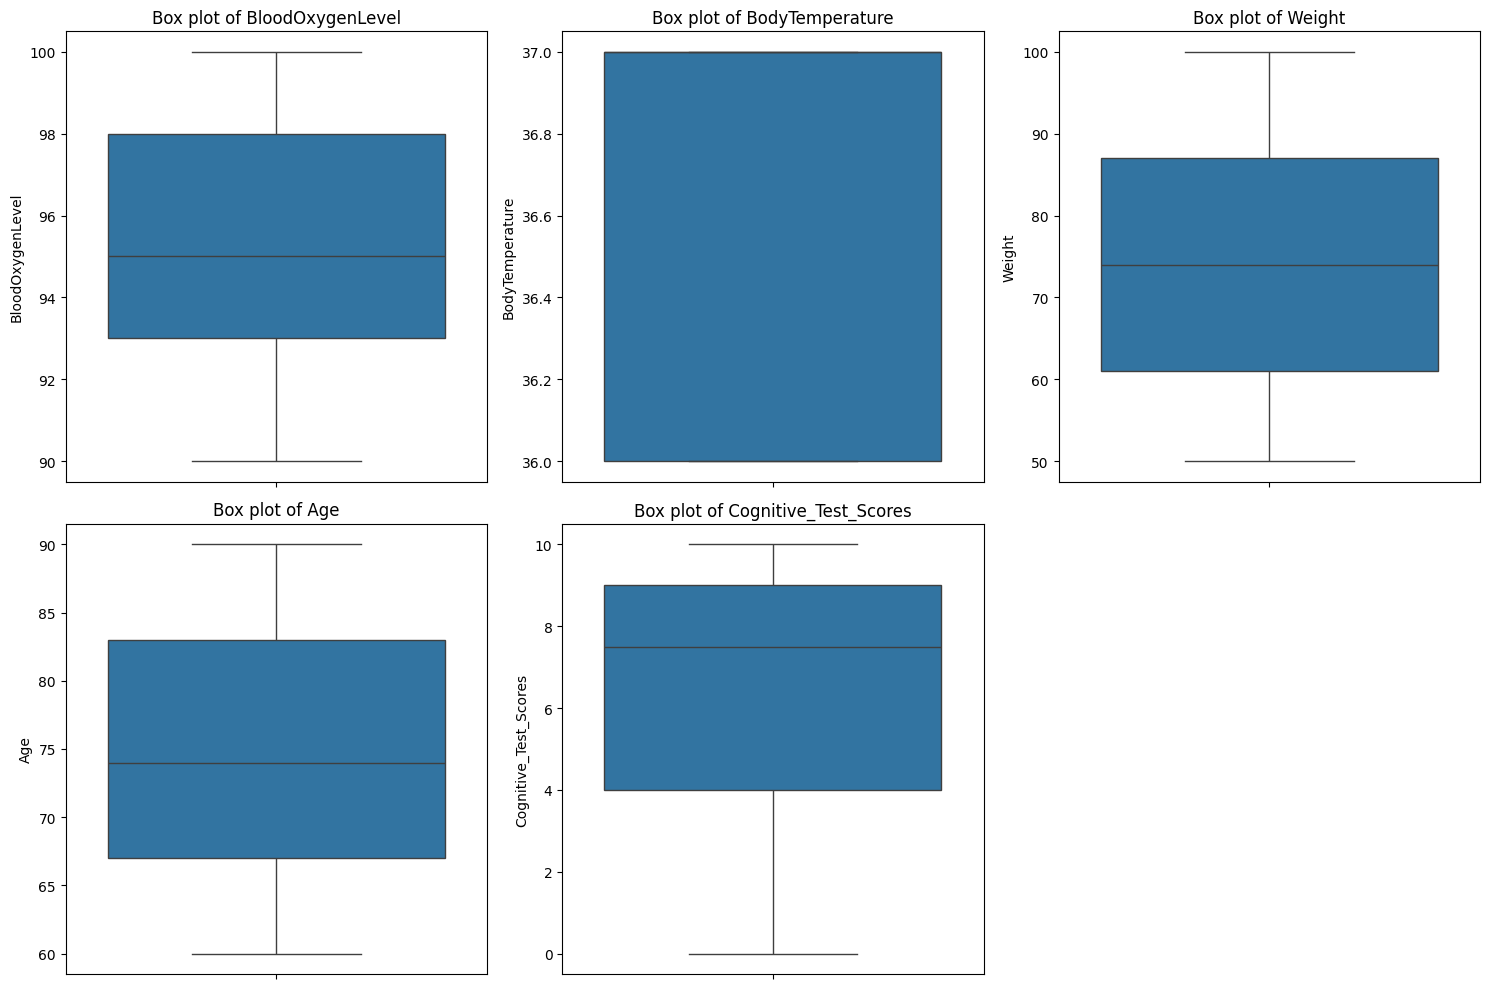

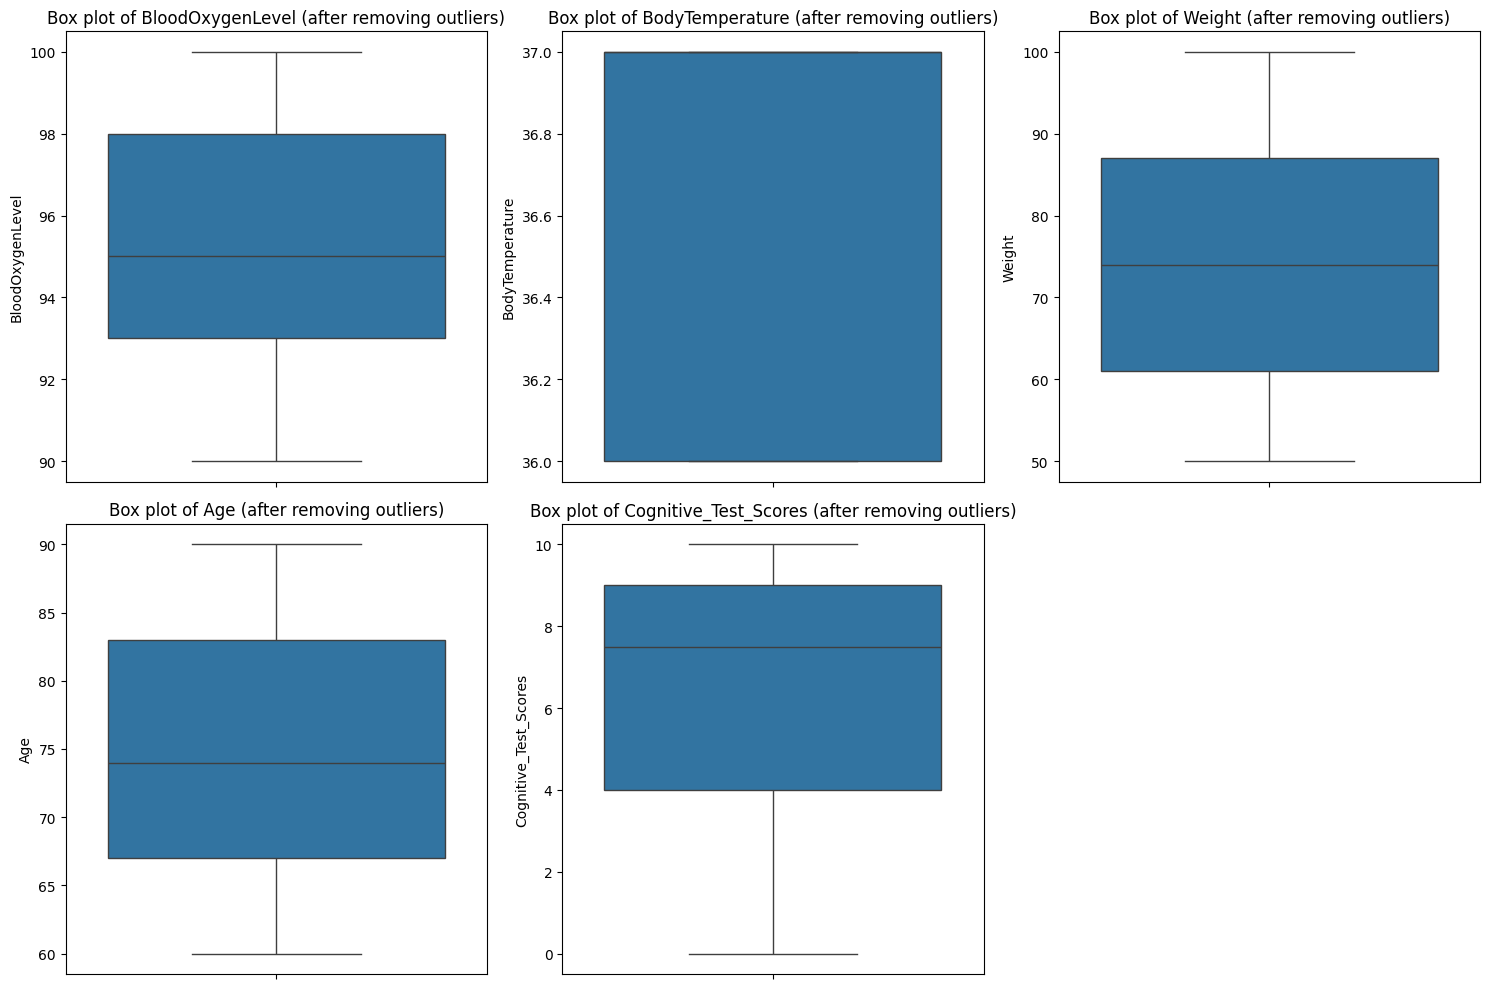

In [ ]:
# Plot box plots for each continuous variable
continuous_vars = ['BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Box plot of {var}')
plt.tight_layout()
plt.show()

# Remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for var in continuous_vars:
    df = remove_outliers(df, var)

# Plot box plots again after removing outliers
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Box plot of {var} (after removing outliers)')
plt.tight_layout()
plt.show()

# **Logistic Regression**

In [ ]:
X.columns

Index(['Diabetic', 'BloodOxygenLevel', 'BodyTemperature', 'Weight',
       'Prescription', 'Age', 'Education_Level', 'Family_History',
       'Smoking_Status', 'APOE_ε4', 'Depression_Status',
       'Cognitive_Test_Scores'],
      dtype='object')

In [ ]:
X.head()

,Diabetic,BloodOxygenLevel,BodyTemperature,Weight,Prescription,Age,Education_Level,Family_History,Smoking_Status,APOE_ε4,Depression_Status,Cognitive_Test_Scores
0,1,96,36,58,3,60,2,0,0,0,0,10
1,0,93,36,57,1,61,3,0,1,1,0,1
2,0,94,37,60,3,69,2,1,1,0,0,8
3,0,94,37,58,0,78,3,1,2,0,1,5
4,1,98,36,68,2,77,3,1,2,1,0,0


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       1.00      0.99      0.99        96

    accuracy                           1.00       206
   macro avg       1.00      0.99      1.00       206
weighted avg       1.00      1.00      1.00       206



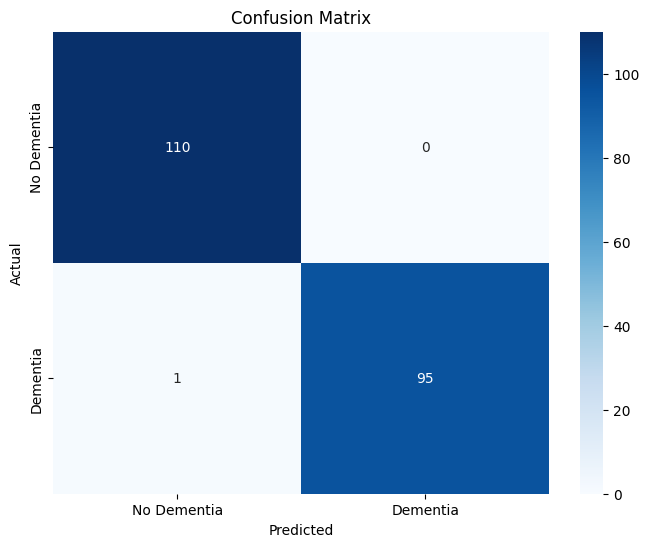

Accuracy: 0.9951456310679612
Precision: 1.0
Recall: 0.9895833333333334
F1 Score: 0.9947643979057591


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Separate features and target
X = df.drop(columns=['Dementia'])
y = df['Dementia']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_log.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1score_log = f1_score(y_test, y_pred)

# Print the classification report
classification_report_log = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_log)

# Confusion matrix
confusion_matrix_log = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dementia', 'Dementia'], yticklabels=['No Dementia', 'Dementia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print calculated metrics
print("Accuracy:", accuracy_log)
print("Precision:", precision_log)
print("Recall:", recall_log)
print("F1 Score:", f1score_log)


# **Random Forest**

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



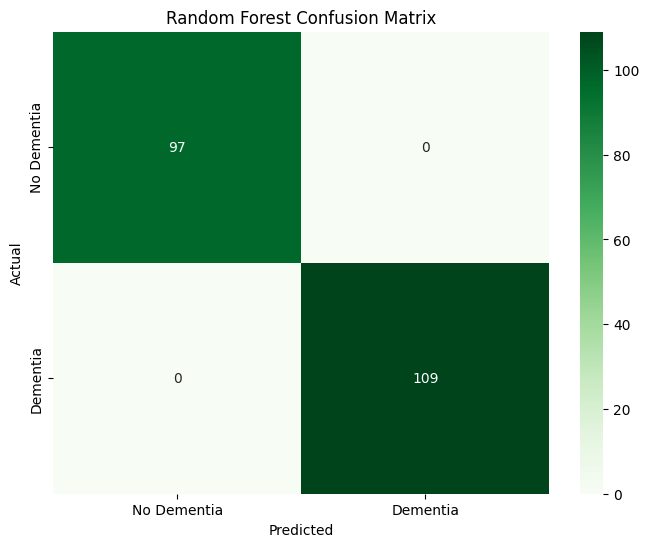

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1score_rf = f1_score(y_test, y_pred_rf)

# Print the classification report for Random Forest
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

# Confusion matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix using seaborn for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Dementia', 'Dementia'], yticklabels=['No Dementia', 'Dementia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Print calculated metrics for Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1score_rf)


# **Naive Bayes**

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



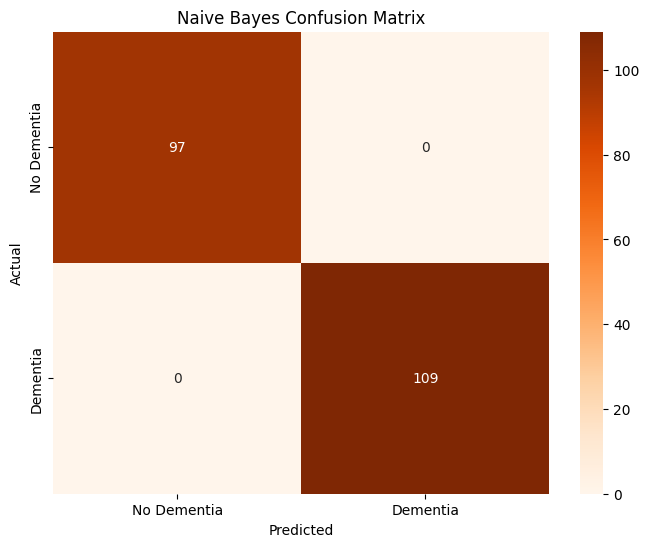

Naive Bayes Accuracy: 1.0
Naive Bayes Precision: 1.0
Naive Bayes Recall: 1.0
Naive Bayes F1 Score: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = model_nb.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1score_nb = f1_score(y_test, y_pred_nb)

# Print the classification report for Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)

# Confusion matrix for Naive Bayes
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix using seaborn for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Dementia', 'Dementia'], yticklabels=['No Dementia', 'Dementia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Print calculated metrics for Naive Bayes
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1 Score:", f1score_nb)


# **KNN**

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        97
           1       0.97      0.92      0.94       109

    accuracy                           0.94       206
   macro avg       0.94      0.94      0.94       206
weighted avg       0.94      0.94      0.94       206



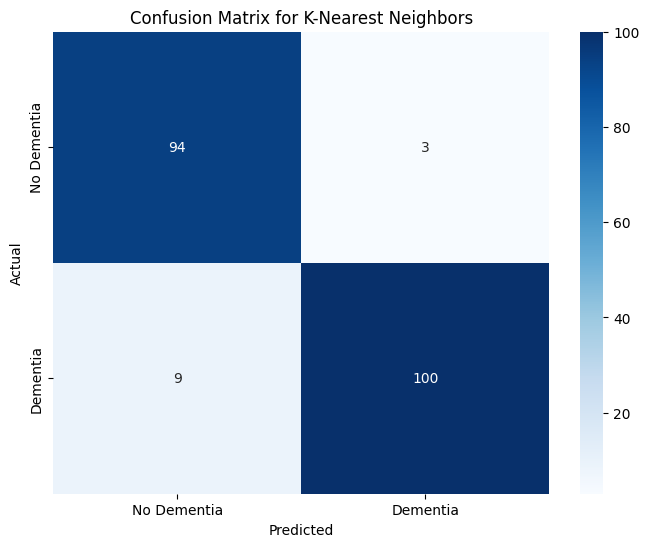

K-Nearest Neighbors - Reduced Features
Accuracy: 0.941747572815534
Precision: 0.970873786407767
Recall: 0.9174311926605505
F1 Score: 0.9433962264150944


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1score_knn = f1_score(y_test, y_pred_knn)

# Print the classification report
classification_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for K-Nearest Neighbors:\n", classification_report_knn)

# Confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Dementia', 'Dementia'], yticklabels=['No Dementia', 'Dementia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

# Print calculated metrics
print("K-Nearest Neighbors - Reduced Features")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1score_knn)


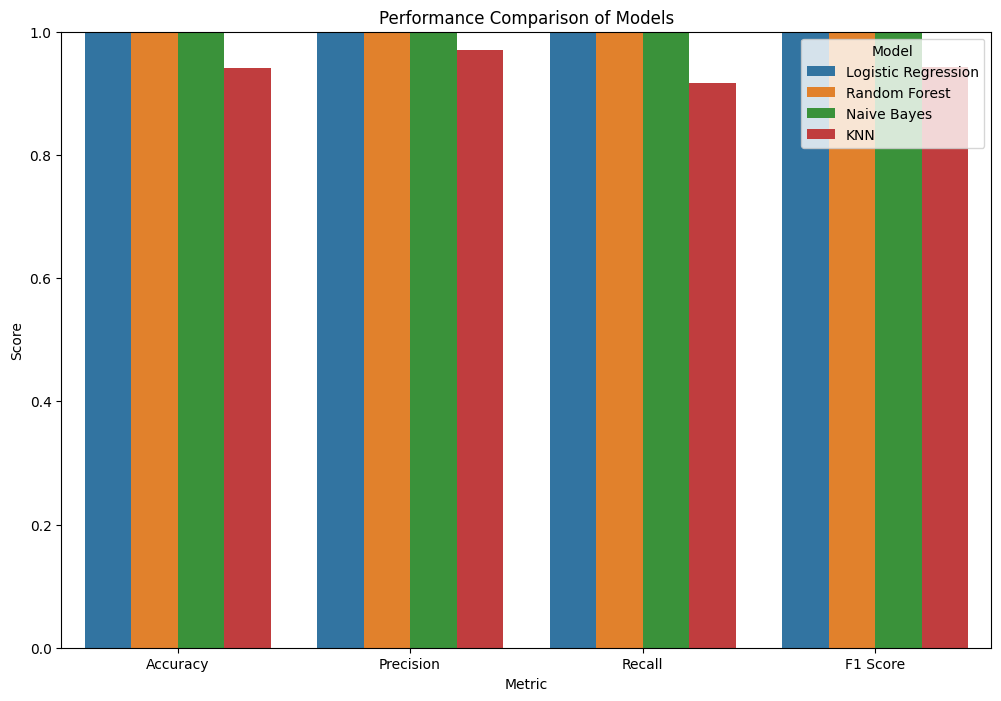

In [ ]:
# Store the performance metrics in a DataFrame
performance_data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression',
              'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
              'Naive Bayes', 'Naive Bayes', 'Naive Bayes', 'Naive Bayes',
              'KNN', 'KNN', 'KNN', 'KNN'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy_log, precision_log, recall_log, f1score_log,
              accuracy_rf, precision_rf, recall_rf, f1score_rf,
              accuracy_nb, precision_nb, recall_nb, f1score_nb,
              accuracy_knn, precision_knn, recall_knn, f1score_knn]
}

df_performance = pd.DataFrame(performance_data)

# Plot the performance metrics using seaborn's countplot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_performance, x='Metric', y='Score', hue='Model')
plt.title('Performance Comparison of Models')
plt.ylim(0, 1)  # Because the metrics are in the range [0, 1]
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation for Random Forest
cv_folds = 10
rf_accuracies = cross_val_score(model_rf, X, y, cv=cv_folds, scoring='accuracy')
rf_avg_accuracy = rf_accuracies.mean()

# Print accuracies at each iteration and the average accuracy
print("Random Forest Accuracies at each fold:", rf_accuracies)
print("Random Forest Average 10-Fold Cross-Validation Accuracy:", rf_avg_accuracy)


Random Forest Accuracies at each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Random Forest Average 10-Fold Cross-Validation Accuracy: 1.0


In [ ]:
# Perform 10-fold cross-validation for Logistic Regression
log_accuracies = cross_val_score(model_log, X, y, cv=cv_folds, scoring='accuracy')
log_avg_accuracy = log_accuracies.mean()

# Print accuracies at each iteration and the average accuracy
print("Logistic Regression Accuracies at each fold:", log_accuracies)
print("Logistic Regression Average 10-Fold Cross-Validation Accuracy:", log_avg_accuracy)


Logistic Regression Accuracies at each fold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Logistic Regression Average 10-Fold Cross-Validation Accuracy: 1.0


In [ ]:
# Perform 10-fold cross-validation for Naive Bayes
nb_accuracies = cross_val_score(model_nb, X, y, cv=cv_folds, scoring='accuracy')
nb_avg_accuracy = nb_accuracies.mean()

# Print accuracies at each iteration and the average accuracy
print("Naive Bayes Accuracies at each fold:", nb_accuracies)
print("Naive Bayes Average 10-Fold Cross-Validation Accuracy:", nb_avg_accuracy)

Naive Bayes Accuracies at each fold: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99029126]
Naive Bayes Average 10-Fold Cross-Validation Accuracy: 0.9990291262135923


In [ ]:
import joblib
joblib.dump(model_log,'dementia_model.pkl')

['dementia_model.pkl']

Column 'Diabetic' unique values:
[1 0]

Column 'BloodOxygenLevel' unique values:
[ 96  93  94  98  95  92 100  90  97  99  91]

Column 'BodyTemperature' unique values:
[36 37]

Column 'Weight' unique values:
[ 58  57  60  68  67  84  70  54  82  78  59  73  92  66  85  55  75  72
  65  80  51  64  95  76 100  79  86  62  74  69  89  77  53  98  50  56
  83  91  71  63  88  81  96  87  99  97  61  93  52  90  94]

Column 'Prescription' unique values:
['No prescription' 'Galantamine' 'Donepezil' 'Memantine' 'Rivastigmine']


Column 'Age' unique values:
[60 61 69 78 77 67 87 66 73 76 64 90 89 72 85 70 75 71 88 63 83 74 79 65
 62 82 84 68 81 80 86]


Column 'Education_Level' unique values:
['Primary School' 'Secondary School' 'No School' 'Diploma/Degree']


Column 'Family_History' unique values:
['No' 'Yes']


Column 'Smoking_Status' unique values:
['Current Smoker' 'Former Smoker' 'Never Smoked']


Column 'APOE_ε4' unique values:
['Negative' 'Positive']



Column 'Depression_Status' unique values:
['No' 'Yes']


Column 'Cognitive_Test_Scores' unique values:
[10  1  8  5  0  7  9  6  2  4  3]

Column 'Dementia' unique values:
[0 1]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the pre-trained Logistic Regression model
model_log = joblib.load('dementia_model.pkl')

# Define label encoders (fitted with training data categories)
label_encoders = {
    'Diabetic': LabelEncoder().fit([0, 1]),  # Assuming '0' and '1' are possible values
    'Education_Level': LabelEncoder().fit([0, 1, 2, 3]),  # Adjust based on your actual categories
    'Family_History': LabelEncoder().fit([0, 1]),  # Assuming '0' and '1' are possible values
    'Smoking_Status': LabelEncoder().fit([0, 1, 2]),  # Adjust based on your actual categories
    'APOE_ε4': LabelEncoder().fit([0, 1]),  # Assuming '0' and '1' are possible values
    'Depression_Status': LabelEncoder().fit([0, 1])  # Assuming '0' and '1' are possible values
}

def preprocess_input(data):
    # Create DataFrame from input data
    df = pd.DataFrame([data])

    # Encode categorical features
    for column in label_encoders:
        if column in df.columns:
            df[column] = label_encoders[column].transform(df[column])

    # Fill missing values if necessary (assuming 0 for simplicity)
    df.fillna(0, inplace=True)

    return df

def predict(user_input):
    # Preprocess the user input
    processed_input = preprocess_input(user_input)

    # Make prediction
    prediction = model_log.predict(processed_input)

    # Return the prediction
    return prediction[0]

# Collect real-time input from the user
def get_user_input():
    data = {
        'Diabetic': int(input("Do You Have Diabetes ? (Yes or No): ")),
        'BloodOxygenLevel': float(input("Enter Your Blood Oxygen Level (Spo2): ")),
        'BodyTemperature': float(input("Enter Your Body Temperature (in degree celsius): ")),
        'Weight': float(input("Enter Your Weight (in kg): ")),
        'Prescription': int(input("Enter any type of prescription associated with you (No prescription if None) : ")),
        'Age': int(input("Enter Your Age: ")),
        'Education_Level': int(input("Choose Your Education Level : ")),
        'Family_History': int(input("Do you have family history of Dementia ? ")),
        'Smoking_Status': int(input("Choose your smoking status : ")),
        'APOE_ε4': int(input("Do you have any problem associated with APOE ε4 ? ")),
        'Physical_Activity': int(input("Do you do any physical activity ?"))
        'Depression_Status': int(input("are your suffering from Depression ? ")),
        'Cognitive_Test_Scores': float(input("What is your cognitive test score ? "))
    }
    return data

# Get user input and make prediction
user_input = get_user_input()
prediction = predict(user_input)
print("Predicted Dementia status:", "Dementia" if prediction == 1 else "No Dementia")


Predicted Dementia status: No Dementia
